# Images

* images are numpy arrays

* image shape is given by it's height, width and num of channels

* An image is made by "pixels"

-- in most cases pixel value range from 0 to 255

-- in binary images pixel value is in [0,1] (or [0,255])

--in 16 bits images pixel value range from 0 to 65535

In [5]:
import cv2

image = cv2.imread('download.jpg')
print(type(image))
print(image.shape) # (height, width, num of channels)
# print(image) # BGR values of each pixel


<class 'numpy.ndarray'>
(178, 283, 3)
[255 254 245]


In [8]:
# showing image
cv2.imshow('Output Window', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Input / Output 

#### Input / Output data using OpenCV 

In [10]:
# image

import cv2
import os

# read image
image_path = os.path.join('.','data','download.jpg')
img = cv2.imread(image_path)

#write image
cv2.imwrite( os.path.join('.','data','image_out.jpg') , img )

# visualize image  
cv2.imshow('image', img)
cv2.waitKey(5000) # wait for 5 seconds
cv2.destroyAllWindows()

In [13]:
# video

import cv2
import os

# read video
video_path = os.path.join('.','data','fire_video.mp4')
cap = cv2.VideoCapture(video_path)

# read first frame
ret, img = cap.read()

# write video frame only if frame is read successfully
if ret and img is not None:
    cv2.imwrite(os.path.join('.', 'data', 'video_frame_out.jpg'), img)
else:
    print("Failed to read the first frame from the video.")

# visualize video
ret = True
while ret:
    ret, frame = cap.read()
    if ret:
        cv2.imshow('video', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [14]:
# webcam

import cv2
import os

# read webcam
cv2.namedWindow("Webcam Output")
webcam = cv2.VideoCapture(0) # 0 is the id for default webcam i want to use

# visualize webcam
while True:
    ret, frame = webcam.read()
    if ret:
        cv2.imshow('Webcam Output', frame)
        if cv2.waitKey(40) & 0xFF == ord('q'): # press 'q' to exit
            break
webcam.release() # release the webcam memory 
cv2.destroyAllWindows()

# Basic operations

### image resizing

In [17]:
import cv2
import os

# read image
image_path = os.path.join('.','data','SpiderMan.jpg')
img = cv2.imread(image_path)
print("Original Dimensions : ", img.shape)

# show original image
cv2.imshow('Original Image', img)
cv2.waitKey(0) # 0 mean wait indefinitely until a key is pressed
cv2.destroyAllWindows()

Original Dimensions :  (168, 300, 3)


In [18]:
# resize image
img_resized = cv2.resize(img, (84,150)) # width, height
print("Resized Dimensions : ", img_resized.shape)

# show resized image
cv2.imshow('Resized Image', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resized Dimensions :  (150, 84, 3)


### image cropping

In [24]:
import cv2
import os

# read image
image_path = os.path.join('.','data','SpiderMan.jpg')
img = cv2.imread(image_path)
print("Original Dimensions : ", img.shape)
print("Original Image Array size :", img.size)

# show original image
cv2.imshow('Original Image', img)
cv2.waitKey(0) # 0 mean wait indefinitely until a key is pressed
cv2.destroyAllWindows()

#  crop image
cropped_img = img[50:168, 200:300] # height, width
print("Cropped Dimensions : ", cropped_img.shape)

# show cropped image
cv2.imshow('Cropped Image', cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (168, 300, 3)
Original Image Array size : 151200
Cropped Dimensions :  (118, 100, 3)


# Colorspaces

In [28]:
import cv2
import os

# read image
img = cv2.imread(os.path.join('.', 'data', 'bird.jpg'))

# show image with all details on it and can git BGR values on mouse click
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[y, x, 0]
        green = img[y, x, 1]
        red = img[y, x, 2]
        print(f'BGR Values at ({x}, {y}): {blue}, {green}, {red}')
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, f'{blue},{green},{red}', (x,y), font, 0.5, (255,255,255), 1)
        cv2.imshow('Image', img)
cv2.imshow('Image', img)
cv2.setMouseCallback('Image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

BGR Values at (145, 59): 81, 149, 186
BGR Values at (172, 93): 200, 216, 223
BGR Values at (172, 93): 200, 216, 223
BGR Values at (128, 127): 44, 59, 31
BGR Values at (98, 85): 68, 72, 47


### convert color spaces

In [35]:
img = cv2.imread(os.path.join('.', 'data', 'bird.jpg'))

# convert BGR to GRAY
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("Gray Image Dimensions : ", gray_img.shape)
print("Gray Image Array size :", gray_img.size)

# show gray image
cv2.imshow('Gray Image', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Gray Image Dimensions :  (183, 275)
Gray Image Array size : 50325


In [36]:
# convert BGR to RGB
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("RGB Image Dimensions : ", rgb_image.shape)
print("Gray Image Array size :", rgb_image.size)

# show RGB image
cv2.imshow('RGB Image', rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

RGB Image Dimensions :  (183, 275, 3)
Gray Image Array size : 150975


In [37]:
# convert BGR to HSV
HSV_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

print("HSV Image Dimensions : ", HSV_image.shape)
print("HSV Image Array size :", HSV_image.size)

# show HSV image
cv2.imshow('HSV Image', HSV_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

HSV Image Dimensions :  (183, 275, 3)
HSV Image Array size : 150975


In [40]:
# Lower red range
red_lower1 = (0, 120, 70)
red_upper1 = (10, 255, 255)

# Upper red range
red_lower2 = (170, 120, 70)
red_upper2 = (180, 255, 255)

HSV_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask1 = cv2.inRange(HSV_image, red_lower1, red_upper1)
mask2 = cv2.inRange(HSV_image, red_lower2, red_upper2)

mask = mask1 | mask2

result = cv2.bitwise_and(img, img, mask=mask)

# show result
cv2.imshow('Red Color Detection', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Blurring

### blur image is work by get average of pixel values in the neighborhood


### functions to blur an image
- blur()
- Gaussian Blur() 
- medianBlur()
- bilateralFilter()


In [41]:
import cv2
import os

# reading the image
img = cv2.imread(os.path.join('.', 'data', 'freelance.jpg'))

# show original image
cv2.imshow('Original Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
# applying classic blur

# blur function takes 3 arguments - source image, kernel size, sigma value
# the larger the kernel size, the more the image will be blurred
# sigma value is set to 0 to let OpenCV automatically calculate it based on kernel size
k_size = (7,7)
blurred_image = cv2.blur(img, k_size, 0)

# show blurred image
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
k_size = (17,17)
blurred_image = cv2.blur(img, k_size, 0)

# show blurred image
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# applying Gaussian blur

# it works similar to classic blur but uses a Gaussian kernel
# gauszian blur function takes 3 arguments - source image, kernel size, sigma value
# sigma value controls the amount of blur
# kernel size should be odd and positive

kernal_size = (15,15)
gaussian_blurred_image = cv2.GaussianBlur(img, kernal_size, 3)

# show Gaussian blurred image
cv2.imshow('Gaussian Blurred Image', gaussian_blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
# applying median blur

# it replaces each pixel value with the median of the pixel values in the surrounding neighborhood
# median blur function takes 2 arguments - source image, kernel size

k_size = 15 # should be odd and positive
median_blurred_image = cv2.medianBlur(img, k_size)

# show median blurred image
cv2.imshow('Median Blurred Image', median_blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
# applying bilateral blur

# it reduces noise while keeping edges sharp
# bilateral blur function takes 4 arguments - source image, diameter of pixel neighborhood, sigmaColor, sigmaSpace
k_size = 15 # diameter of each pixel neighborhood
bilateral_blurred_image = cv2.bilateralFilter(img, k_size, 75, 75)

# show bilateral blurred image
cv2.imshow('Bilateral Blurred Image', bilateral_blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### blur can use different algorithms like bilateral, etc. depending on the requirement

### bilateral blur is effective in noise reduction while preserving edges

### blur can use to reduce high frequency noise in images

# Threshold

### there is 2 different type of thresholding
- simple thresholding
- adaptive thresholding


In [48]:
import cv2
import os

# read image
img = cv2.imread(os.path.join('.', 'data', 'bear.jpg'))

# show original image
cv2.imshow('Original Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
# convert BGR to GRAY
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Gray Image Dimensions : ", gray_img.shape)
print("Gray Image Array size :", gray_img.size)

# show gray image
cv2.imshow('Gray Image', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Gray Image Dimensions :  (168, 300)
Gray Image Array size : 50400


In [ ]:
# apply theresholding

# theresholding is used to segment an image by setting pixel values to either max value or 0 based on a threshold
# theresholding can be used for binarization of images
# theresholding types - binary, binary inverted, truncation, to zero, to zero inverted
# theresholding types can be specified using cv2.THRESH_* constants
# theresholding function takes 4 arguments - source image, threshold value, max value, threshold

# here we use binary theresholding

# pixel values above 127 are set to 255, below are set to 0
# source image should be in grayscale
# ret is a boolean indicating if theresholding was successful
# thresh_img is the resultant thresholded image

# apply theresholding
ret, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
print("Thresholded Image Dimensions : ", thresh_img.shape)
print("Thresholded Image Array size :", thresh_img.size)

# show thresholded image
cv2.imshow('Thresholded Image', thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thresholded Image Dimensions :  (168, 300)
Thresholded Image Array size : 50400


In [51]:
# apply blur on thresholded image
blurred_thresh_img = cv2.blur(thresh_img, (5,5), 0)

# show blurred thresholded image
cv2.imshow('Blurred Thresholded Image', blurred_thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import os

# read image
img = cv2.imread(os.path.join('.', 'data', 'handwritten.jpg'))

# show original image
cv2.imshow('Original Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# convert BGR to GRAY
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Gray Image Dimensions : ", gray_img.shape)
print("Gray Image Array size :", gray_img.size)

# show gray image
cv2.imshow('Gray Image', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Gray Image Dimensions :  (267, 189)
Gray Image Array size : 50463


In [6]:
# apply adaptive thresholding

# adaptive thresholding is used when the lighting conditions in the image are not uniform
# it calculates the threshold for each pixel based on the pixel values in its neighborhood
# adaptive thresholding function takes 5 arguments - source image, max value, adaptive method, threshold type, block size, C
# adaptive method can be either cv2.ADAPTIVE_THRESH_MEAN_C or cv2.ADAPTIVE_THRESH_GAUSSIAN_C
# threshold type can be either cv2.THRESH_BINARY or cv2.THRESH_BINARY_INV
# block size is the size of the neighborhood area used to calculate the threshold for each pixel
# C is a constant subtracted from the mean or weighted mean calculated for the neighborhood area, it helps to fine-tune the thresholding result
# i don't need to specify threshold value as in classic thresholding, it is calculated automatically for each pixel based on its neighborhood

adaptive_thresh_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
print("Adaptive Thresholded Image Dimensions : ", adaptive_thresh_img.shape)
print("Adaptive Thresholded Image Array size :", adaptive_thresh_img.size)

# show adaptive thresholded image
cv2.imshow('Adaptive Thresholded Image', adaptive_thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Adaptive Thresholded Image Dimensions :  (267, 189)
Adaptive Thresholded Image Array size : 50463


# Edge detection

In [2]:
# there is 3 algorithms for edge detection in OpenCV - Canny, Sobel, Laplacian
# 1. Canny Edge Detection - most commonly used and effective

# Canny edge detection is a multi-stage algorithm that detects edges in an image by looking for areas of rapid intensity change
# it uses a combination of Gaussian blur, gradient calculation, non-maximum suppression, and hyster

import cv2
import os
import numpy as np

# reading image
img = cv2.imread(os.path.join('.', 'data', 'BasketballPlayer.jpg'))

# show original image
cv2.imshow('Original Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# apply canny edge detection
from networkx import edges


image_edges = cv2.Canny(img, 100, 200) # lower and upper thresholds for hysteresis
print("Edges Image Dimensions : ", image_edges.shape)
print("Edges Image Array size :", image_edges.size)

# show edges image
cv2.imshow('Edges Image', image_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Edges Image Dimensions :  (258, 195)
Edges Image Array size : 50310


In [8]:
# dilate the edges to make them more visible
image_edge_d = cv2.dilate(image_edges, np.ones((5,5), np.uint8)) # dilate the edges to make them more visible

# show dilated edges image
cv2.imshow('Dilated Edges Image', image_edge_d)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# erode the edges to make them thinner
image_edge_e = cv2.erode(image_edge_d, np.ones((5,5), np.uint8), iterations=1) # erode the edges to make them thinner

# show eroded edges image
cv2.imshow('Eroded Edges Image', image_edge_e)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Drawing

In [10]:
import cv2
import os

# reading image
img = cv2.imread(os.path.join('.', 'data', 'whiteboard.jpg'))

# show original image
cv2.imshow('Original Image', img)
cv2.waitKey(0) # 0 mean wait indefinitely until a key is pressed
cv2.destroyAllWindows()

In [12]:
# line
cv2.line(img, (50,50), (200,200), (0,255,0), 1) # line from (50,50) to (200,200) with green color and thickness of 5

# show line image
cv2.imshow('Line Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# rectangle
cv2.rectangle(img, (50,50), (200,200), (255,0,0), 2) # rectangle from (50,50) to (200,200) with blue color and thickness of 2

# show rectangle image
cv2.imshow('Rectangle Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# circle
cv2.circle(img, (150,150), 50, (0,0,255), 3) # circle with center at (150,150), radius 50, red color and thickness of 3

# show circle image
cv2.imshow('Circle Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
print(img.shape)

(182, 277, 3)


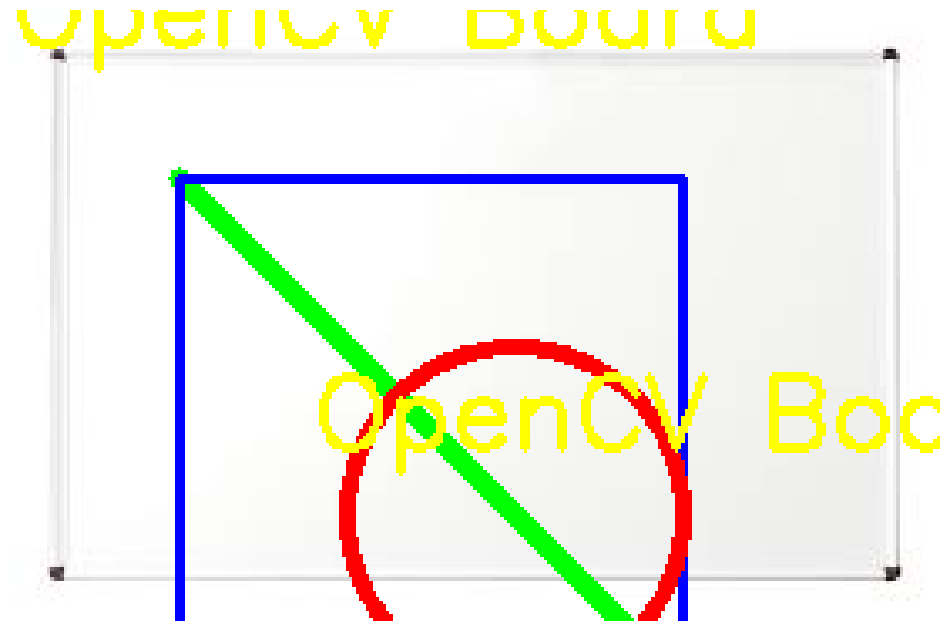

In [25]:
import cv2
import matplotlib.pyplot as plt
import os

# text
cv2.putText(img, 'OpenCV Board', (90,130), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2)

# convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show text image using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


# Contours

In [28]:
# use contour to detect shapes in an image
# can use for object detection, shape analysis, image segmentation, etc.

import cv2
import os
# read image
img = cv2.imread(os.path.join('.', 'data', '2_birds.png'))

# check if image was loaded successfully
if img is None:
    print("Error: Could not read the image.")
    exit()
	# show original image
	cv2.imshow('Original Image', img)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

In [ ]:
# apply Gaussian simple threshold
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret , thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)
print("Thresholded Image Dimensions : ", thresh_img.shape)
print("Thresholded Image Array size :", thresh_img.size)

# show thresholded image
cv2.imshow('Thresholded Image', thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thresholded Image Dimensions :  (148, 215)
Thresholded Image Array size : 31820


In [30]:
# find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# show contours image
cv2.imshow('Contours Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# calculate area of contours
for i, contour in enumerate(contours):
    # calculate area of contour
    area = cv2.contourArea(contour)
    print(f'Contour {i} Area: {area}')

Contour 0 Area: 0.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Contour 3 Area: 0.0
Contour 4 Area: 213.5
Contour 5 Area: 4.0
Contour 6 Area: 0.0
Contour 7 Area: 0.0
Contour 8 Area: 0.0
Contour 9 Area: 0.0
Contour 10 Area: 8.5
Contour 11 Area: 0.0
Contour 12 Area: 1.0
Contour 13 Area: 36.0
Contour 14 Area: 0.0
Contour 15 Area: 0.0
Contour 16 Area: 4.0
Contour 17 Area: 60.0
Contour 18 Area: 0.0
Contour 19 Area: 0.0
Contour 20 Area: 31.5
Contour 21 Area: 76.0
Contour 22 Area: 0.0
Contour 23 Area: 0.0
Contour 24 Area: 0.0
Contour 25 Area: 0.0
Contour 26 Area: 6.5
Contour 27 Area: 35.0
Contour 28 Area: 0.0
Contour 29 Area: 0.0
Contour 30 Area: 147.5
Contour 31 Area: 2.0
Contour 32 Area: 0.0
Contour 33 Area: 0.0
Contour 34 Area: 0.0
Contour 35 Area: 0.0
Contour 36 Area: 100.0
Contour 37 Area: 5.0
Contour 38 Area: 0.0
Contour 39 Area: 0.0
Contour 40 Area: 0.0
Contour 41 Area: 2.0
Contour 42 Area: 957.0
Contour 43 Area: 2.0
Contour 44 Area: 7.5
Contour 45 Area: 6.0
Contour 46 Area: 2.0
Contour 47

In [35]:
for i, contour in enumerate(contours):
    # calculate area of contour
    if cv2.contourArea(contour) > 100: # filter contours based on area
        cv2.drawContours(img, [contour], -1, (255, 0, 0), 2) # draw contour on original image

# show contours image
cv2.imshow('Contours Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

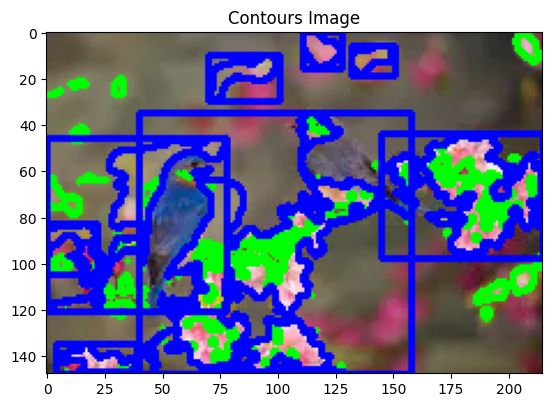

In [38]:
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > 100: # filter contours based on area
        x1 , y1, w, h = cv2.boundingRect(contour) # get bounding box of contour
        cv2.rectangle(img, (x1, y1), (x1+w, y1+h), (255, 0, 0), 2) # draw bounding box on original image
    
# show contours image   
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contours Image')
plt.show()